In [2]:
#Import all the required dependencies
import os 
import sys
import pandas as pd
import numpy as np
import geopandas
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Import Weather Dataset
weatherdata = os.path.abspath(os.path.join(os.getcwd(), '../Dataset/PredictorFinalWithSTDS.csv'))
WeatherData =  pd.read_csv(weatherdata)

In [11]:
WeatherData.drop(['date'], axis = 1, inplace = True)

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss

In [13]:
X = WeatherData.drop('AoB_Category', axis = 1)
y = WeatherData['AoB_Category']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

In [24]:
pipe_knn = Pipeline(steps=[
    ("scaler", StandardScaler()), 
    ("knn", KNeighborsClassifier())
])

params_knn = {
    'knn__n_neighbors':range(5, 10, 5), 
    'knn__algorithm':['auto'], 
    'knn__p':[1, 2]
}

search_knn = RandomizedSearchCV(pipe_knn, params_knn, scoring='accuracy', cv=3, refit=True, n_iter=2, verbose = 2)

search_knn.fit(X_train, y_train)
y_hat_knn = search_knn.predict(X_test)


Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] END ..knn__algorithm=auto, knn__n_neighbors=5, knn__p=1; total time=  36.1s
[CV] END ..knn__algorithm=auto, knn__n_neighbors=5, knn__p=1; total time=  31.9s
[CV] END ..knn__algorithm=auto, knn__n_neighbors=5, knn__p=1; total time=  30.7s
[CV] END ..knn__algorithm=auto, knn__n_neighbors=5, knn__p=2; total time=  13.5s
[CV] END ..knn__algorithm=auto, knn__n_neighbors=5, knn__p=2; total time=  13.4s
[CV] END ..knn__algorithm=auto, knn__n_neighbors=5, knn__p=2; total time=  12.8s


In [27]:
display(search_knn.best_params_)
display(search_knn.best_score_)

{'knn__p': 1, 'knn__n_neighbors': 5, 'knn__algorithm': 'auto'}

0.9839179794728526

In [30]:
from sklearn.ensemble import RandomForestClassifier
rand_clf = RandomForestClassifier(max_depth=2, random_state = 42)
rand_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=42)

In [33]:
from sklearn.metrics import accuracy_score
y_pred = rand_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8683344305464121

[[    0   376   570     0     0]
 [    0  6490     0     0     0]
 [    0  1387  2580     0   483]
 [    0   184     0     0     0]
 [    0     0     0     0 10715]]


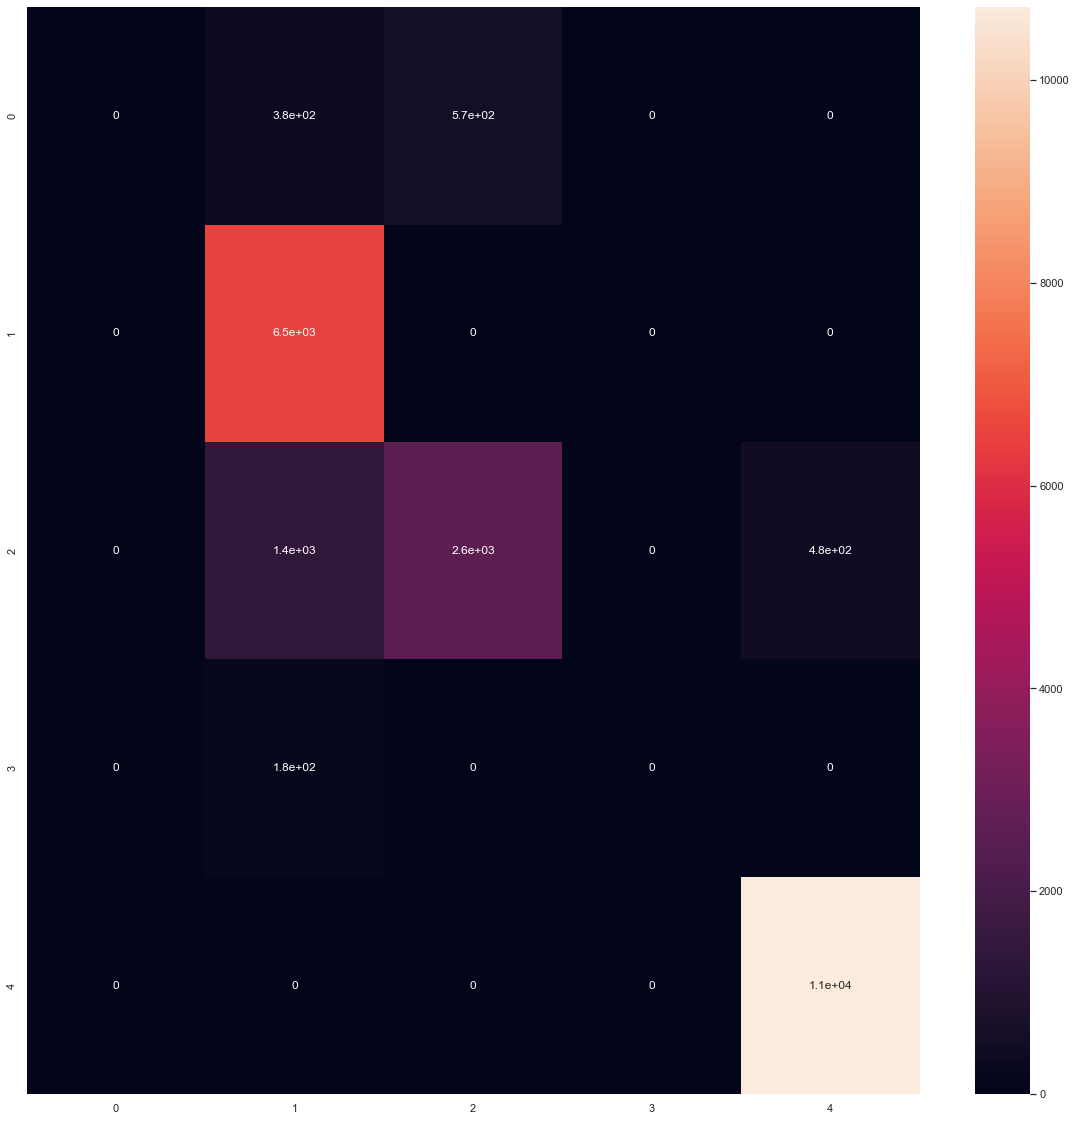

NameError: name 'classification_report' is not defined

In [34]:
print(confusion_matrix(y_test, rand_clf.predict(X_test)))
sns.set(rc={'figure.figsize':(20,20)})
sns.heatmap(confusion_matrix(y_test, rand_clf.predict(X_test)), annot = True)
plt.show()
print(classification_report(y_test, rand_clf.predict(X_test)))